# Introduction to financial technical analysis

# 📌 Objectives

By the end of this notebook, students will be able to:

1. **Access and Manipulate Financial Data:**
   - Use the `yfinance` library to retrieve historical stock prices for all companies in the S&P 500 index.

2. **Compute Key Technical Indicators:**
   - Calculate 50-day and 200-day moving averages for each stock in the index.

3. **Detect Trading Signals:**
   - Identify Golden Crosses and Death Crosses as described in technical analysis literature.

4. **Analyze Recent Market Behavior:**
   - Isolate and examine stocks that experienced technical signals (crosses) in the last 14 days.

5. **Visualize Price Trends and Volatility:**
   - Plot historical price movements along with moving averages, and compute volatility around signal dates.

6. **Interpret Technical Indicators in Context:**
   - Reflect on what Golden and Death Crosses signify and how traders may respond to them.

7. **Evaluate Strategy Viability:**
   - Discuss the strengths and limitations of using moving averages as a standalone trading strategy.

8. **Connect Technical Analysis to Broader Market Intelligence:**
   - Explore how sentiment analysis and news (covered in later sections) could complement technical signals.

9. **Develop Critical Thinking About Signal Reliability:**
   - Assess potential risks of false positives and propose improvements or filters to enhance signal accuracy.

10. **Engage in Strategic Reflection:**
    - Answer analytical questions aimed at understanding the utility, risks, and presentation of the strategy to a professional audience.


## Import and install librairies

In [1]:
%pip install pandas
%pip install yfinance
%pip install lxml
%pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import numpy as np

## Get the list of stocks in the S&P 500

In [3]:
# Read and print the stock tickers that make up S&P500
df_tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
df_tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [4]:
ticker_list = df_tickers['Symbol'].tolist()

In [5]:
ticker_list[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

## Get the closing price of all 500 stocks in the S&P 500 Index
Use the yfinance library to retrieve the close price of all 500 stocks in the index between 2024-05-01 and 2025-05-01
https://ranaroussi.github.io/yfinance/reference/yfinance.stock.html

In [6]:
start_date = '2024-05-01'
end_date = '2025-05-01'

### Load the closing prices of the ticker list

In [7]:
df_prices = yf.download(
    tickers=ticker_list,
    start=start_date,
    end=end_date,
    auto_adjust=False,
    progress=False
)['Close']

ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
ERROR:yfinance:['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2024-05-01 -> 2025-05-01)')


In [8]:
df_prices.head()

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,138.690002,169.300003,161.720001,156.160004,106.290001,95.800003,298.660004,469.390015,193.889999,58.369999,...,30.200001,92.730003,53.779999,116.029999,130.960007,66.839996,135.330002,119.559998,309.049988,158.500000
2024-05-02,137.520004,173.029999,160.809998,158.330002,105.919998,95.169998,300.339996,476.570007,196.490005,59.349998,...,31.010000,95.269997,53.790001,116.239998,135.990005,70.300003,135.070007,118.459999,312.709991,167.229996
2024-05-03,139.449997,183.380005,163.789993,159.710007,105.900002,94.410004,303.709991,486.179993,199.630005,59.169998,...,31.090000,96.709999,54.250000,116.000000,137.210007,69.470001,134.339996,121.660004,309.589996,167.070007
2024-05-06,140.610001,181.710007,162.729996,162.000000,105.639999,97.139999,306.059998,493.589996,203.320007,60.189999,...,31.080000,97.870003,54.360001,116.750000,139.199997,73.529999,136.179993,120.559998,315.790009,165.949997
2024-05-07,141.270004,182.399994,162.550003,159.809998,106.169998,98.209999,310.660004,492.269989,203.570007,61.590000,...,30.850000,97.230003,55.020000,116.169998,140.029999,71.599998,135.910004,121.430000,317.869995,168.449997


## Identify Golden and Death Crosses

### Get Moving Averages 50 days and 200 days

In [9]:
# Creating rolling windows of 50 and 200 days
# then, calculate the mean
df_ma50 = df_prices.rolling(window=50).mean()
df_ma200 = df_prices.rolling(window=200).mean()

Note: In order to compute a 50-day moving average, data from the preceding 50 days is required; thus, the initial 49 entries return a NaN value due to insufficient prior data.

In [10]:
df_ma50

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,119.016199,219.517001,198.1558,128.497001,130.7974,91.7206,324.0728,401.392800,205.5734,46.8612,...,28.5870,82.8620,69.5392,110.0112,120.499999,60.865000,152.212599,105.7232,277.851799,159.9602
2025-04-25,118.380199,218.965201,198.0170,128.136801,130.7646,91.7690,322.1640,399.492000,205.3626,46.9218,...,28.4914,82.9368,69.5712,110.0356,120.223799,60.367001,152.228399,105.7736,275.718199,159.5520
2025-04-28,117.788600,218.337401,197.9948,127.782001,130.7194,91.7896,320.2384,397.680000,205.0502,46.9686,...,28.4088,82.9714,69.5948,110.0456,119.920399,59.847600,152.208399,105.8106,274.119598,159.3248


In [11]:
df_ma50[48:50]

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-12,137.5686,200.9958,165.098399,149.230201,104.2098,99.6684,299.313199,500.9836,225.0338,61.339,...,29.5316,92.0866,54.3222,114.3658,138.9204,66.5818,135.5346,113.1966,312.594799,171.9108


Note: In order to compute a 200-day moving average, data from the preceding 200 days is required; thus, the initial 199 entries return a NaN value due to insufficient prior data.

In [12]:
df_ma200

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24,133.84415,227.72455,188.174400,130.701575,118.59795,98.59505,343.51900,478.509449,217.32740,53.70830,...,30.28480,85.71540,65.47495,113.78345,126.50165,72.28710,138.32925,107.43220,346.199799,174.59150
2025-04-25,133.74845,227.62755,188.264450,130.551875,118.73400,98.55845,343.49565,477.517949,217.14030,53.63390,...,30.27100,85.70215,65.55760,113.77160,126.41420,72.25500,138.43245,107.41095,345.854800,174.48765
2025-04-28,133.64745,227.51335,188.385450,130.409175,118.86640,98.52690,343.48470,476.538299,216.91725,53.55300,...,30.26095,85.69360,65.64255,113.75515,126.31210,72.22490,138.52535,107.38525,345.453200,174.38805


In [13]:
df_ma200[198:200]

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2025-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-18,138.62655,223.33275,180.405999,135.917425,112.50095,100.41175,339.0881,501.402149,221.7258,56.963,...,30.54715,88.02035,61.96835,114.7945,130.98,74.0732,134.52795,109.16085,355.05165,177.32065


### Detecting Golden and Death Crosses in the last 14 days

### This function will detect the golden and death crosses in the last 14 days

In [14]:
def detect_crosses(df_ma50, df_ma200, day_range):
    golden_crosses = []
    death_crosses = []
    day_range = day_range + 1
    # Loop list of tickers
    for ticker in ticker_list:
        # Remove the NaN values
        ma50 = df_ma50[ticker].dropna()
        ma200 = df_ma200[ticker].dropna()
        # verify ma50 and ma200 have at least 14 days of data
        if len(ma50) < day_range or len(ma200) < day_range:
            continue
        # get the last 14 days of each moving average
        recent_ma50 = ma50[-day_range:]
        recent_ma200 = ma200[-day_range:]
        for i in range(1, len(recent_ma50)):
            # previous day ma50 was below ma200 and today's ma50 is above ma200
            if recent_ma50[i-1] < recent_ma200[i-1] and recent_ma50[i] > recent_ma200[i]:
                print("Golden cross found for {}".format(ticker))
                golden_crosses.append(ticker)
                break
            # previos day ma50 was above ma200 and today's ma50 is below ma200
            elif recent_ma50[i-1] > recent_ma200[i-1] and recent_ma50[i] < recent_ma200[i]:
                print("Death cross found for {}".format(ticker))
                death_crosses.append(ticker)
                break
    return sorted(golden_crosses), sorted(death_crosses)


In [15]:
golden_crosses, death_crosses = detect_crosses(df_ma50, df_ma200, 14)

/tmp/ipython-input-14-3493341501.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if recent_ma50[i-1] < recent_ma200[i-1] and recent_ma50[i] > recent_ma200[i]:
/tmp/ipython-input-14-3493341501.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif recent_ma50[i-1] > recent_ma200[i-1] and recent_ma50[i] < recent_ma200[i]:


Death cross found for APD
Death cross found for AMZN
Death cross found for AXP
Golden cross found for AMT
Golden cross found for AWK
Death cross found for AMP
Death cross found for AME
Death cross found for APO
Death cross found for ADSK
Death cross found for BAC
Death cross found for BLK
Death cross found for CPT
Death cross found for KMX
Death cross found for CCL
Death cross found for CTAS
Death cross found for CFG
Death cross found for CTSH
Death cross found for CEG
Death cross found for GLW
Death cross found for CMI
Death cross found for DVA
Death cross found for DAL
Golden cross found for EW
Death cross found for EMR
Death cross found for EQIX
Death cross found for ESS
Death cross found for FTV
Death cross found for GDDY
Death cross found for HSIC
Death cross found for HLT
Death cross found for HBAN
Death cross found for IP
Golden cross found for KDP
Death cross found for KEYS
Death cross found for LULU
Death cross found for MTB
Death cross found for MAR
Death cross found for MET


#### Golden crosses
List the first top companies in alphabetical order (by there symbol or ticker) that had a golden cross in the last 14 days:

Note: In the past 14 days, fewer than 10 golden crosses were identified, only 7 occurred during that period.

In [16]:
golden_crosses

['AMT', 'AWK', 'EW', 'KDP', 'MOH', 'NEM', 'TSN']

#### Death crosses
List the first 10 companies in alphabetical order (by there symbol or ticker) that had a death cross in the last 14 days:

In [17]:
death_crosses[:10]

['ADSK', 'AME', 'AMP', 'AMZN', 'APD', 'APO', 'AXP', 'BAC', 'BLK', 'CCL']

### Visualization of the results
(in alphabetical order)

#### Compute the volatility of every stock and print it in the title of each plot

The following formula estimates volatility by calculating percentage changes with pct_changes(), then computing their standard deviation via std(), and finally annualizing daily volatility using np.sqrt(252)
where 252 approximates the number of trading days in a financial year


In [18]:
volatility = df_prices.pct_change().std() * np.sqrt(252)

/tmp/ipython-input-18-1477697390.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  volatility = df_prices.pct_change().std() * np.sqrt(252)


In [19]:
volatility.head()

,0
Ticker,
A,0.295476
AAPL,0.326774
ABBV,0.272446
ABNB,0.413837
ABT,0.207427


##Plot Interpretation:
In the following plots depicting golden and death crosses, the blue line represents historical prices over the year, the orange line indicates the 50-day moving average, and the green line the 200-day moving average. A golden cross occurs when the 50-day moving average crosses above the 200-day, while a death cross is when it crosses below.

#### Plot top 10 stocks that had Golden Crosses in the last 14 days

- You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
- For each plot, put the volatility of the stock in the title of the plot

Note: In the past 14 days, fewer than 10 golden crosses were identified, only 7 occurred during that period.

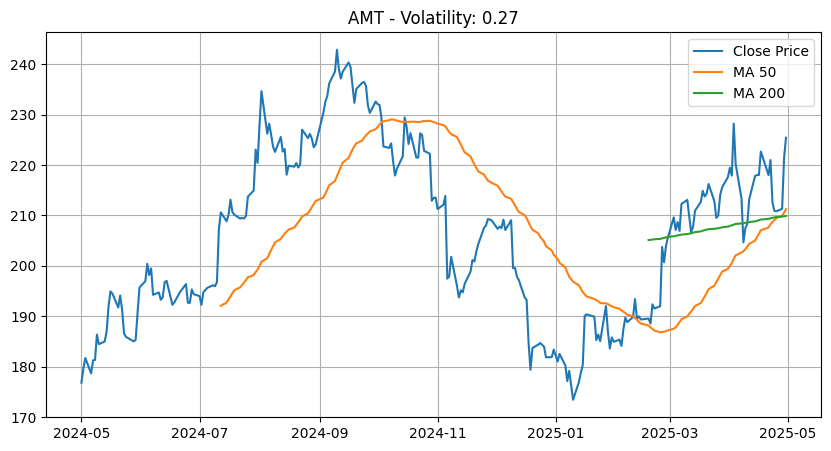

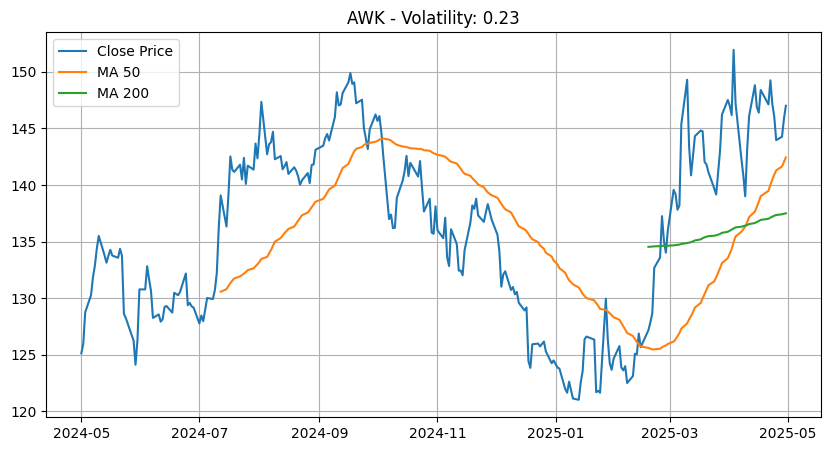

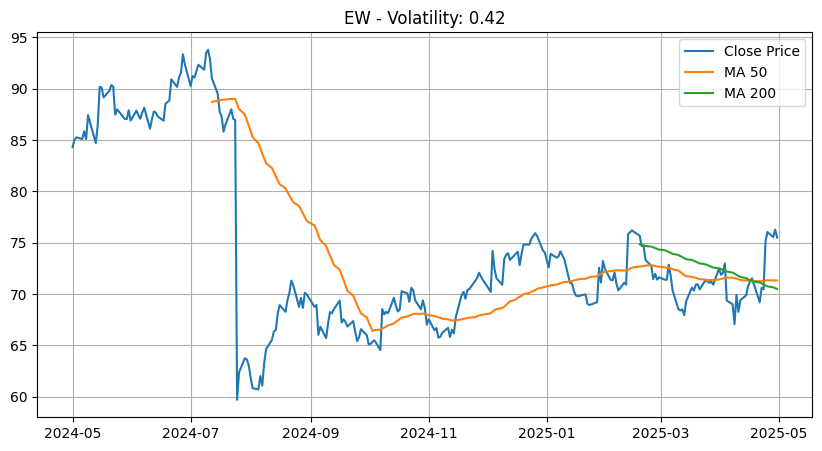

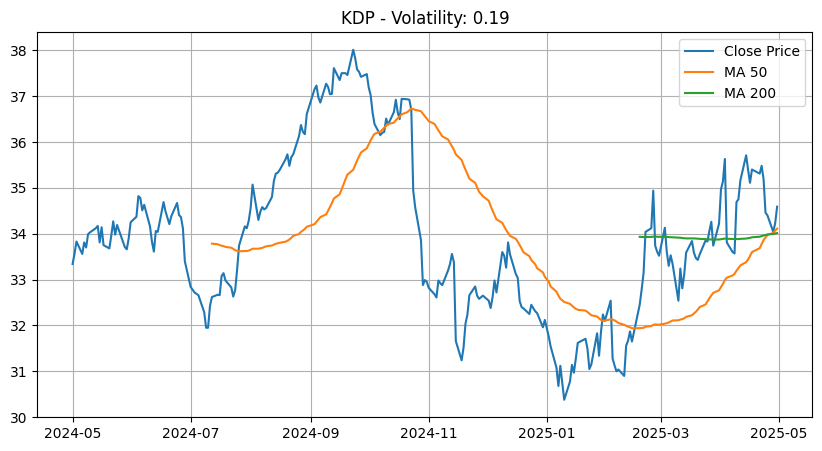

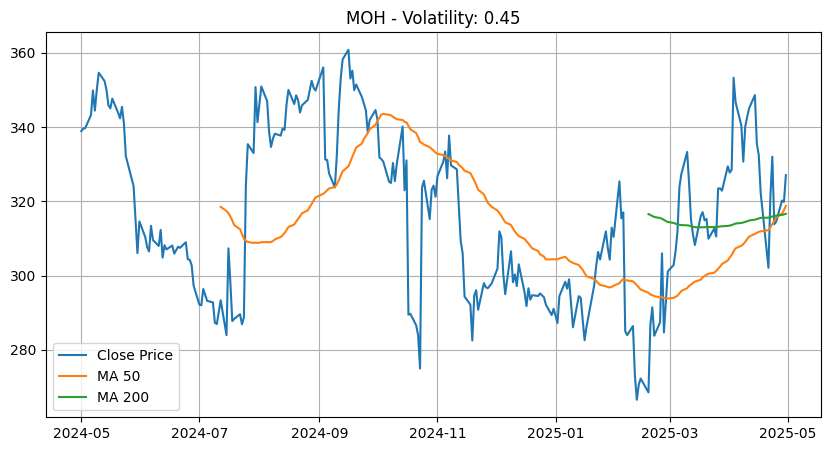

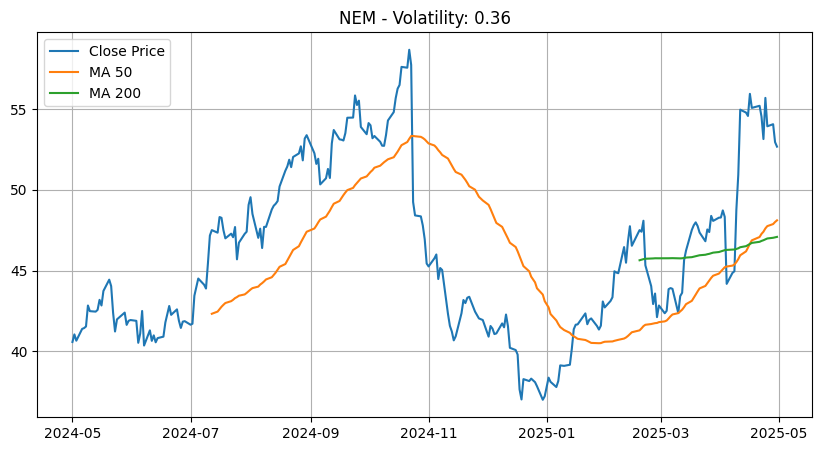

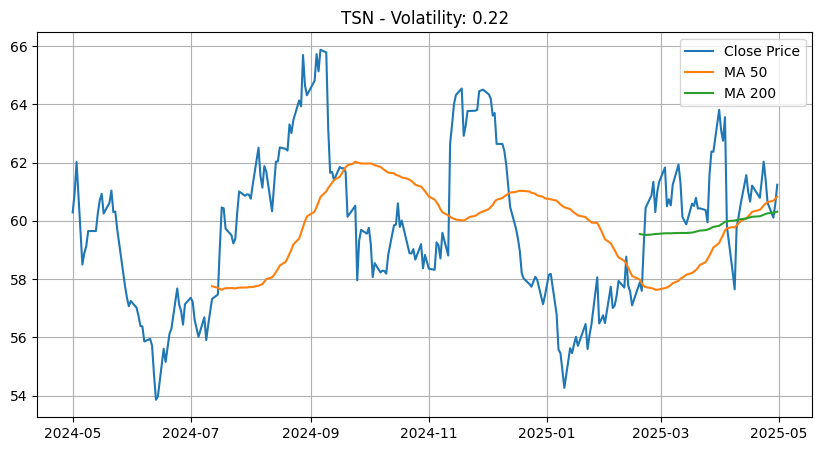

In [21]:
for ticker in golden_crosses[:10]:
    plt.figure(figsize=(10, 5))
    plt.plot(df_prices[ticker], label='Close Price')
    plt.plot(df_ma50[ticker], label='MA 50')
    plt.plot(df_ma200[ticker], label='MA 200')
    plt.title(f'{ticker} - Volatility: {volatility[ticker]:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

### Plot top 10 stocks that had Death Crosses in the last 14 days

You should have 10 plots (use a for loop) for every stock in the top 10 (in alphabetical order)
For each plot, put the volatility of the stock in the title of the plot

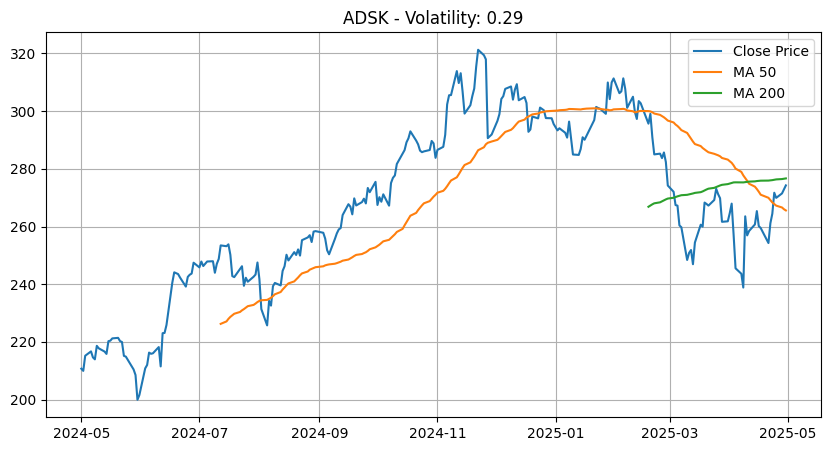

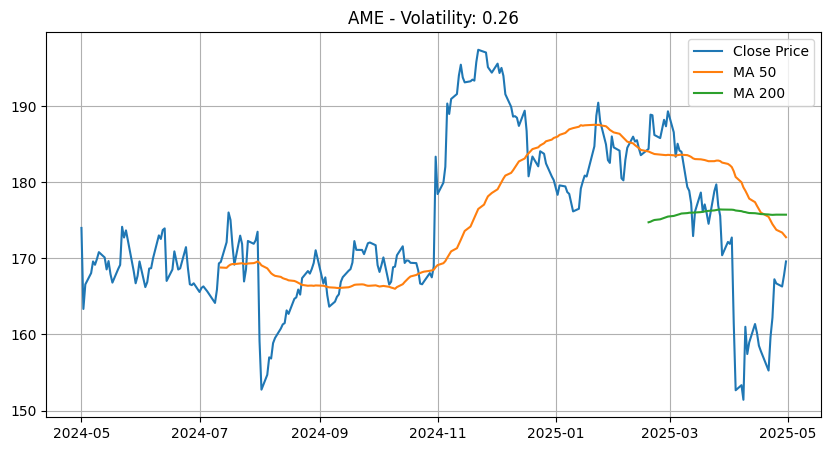

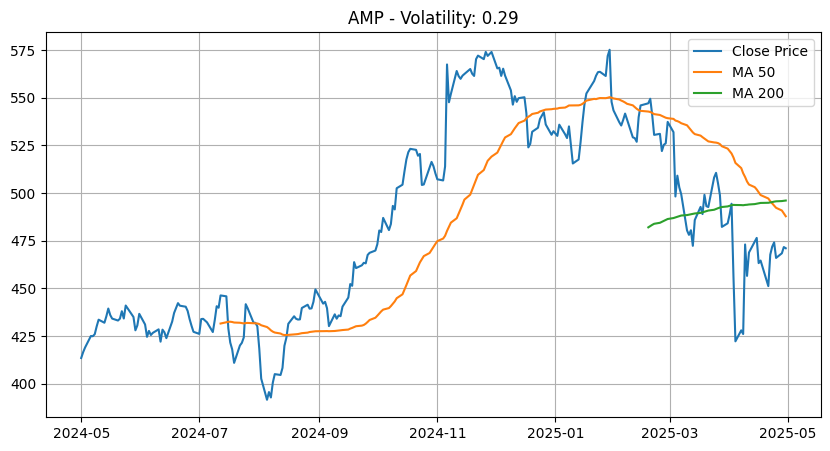

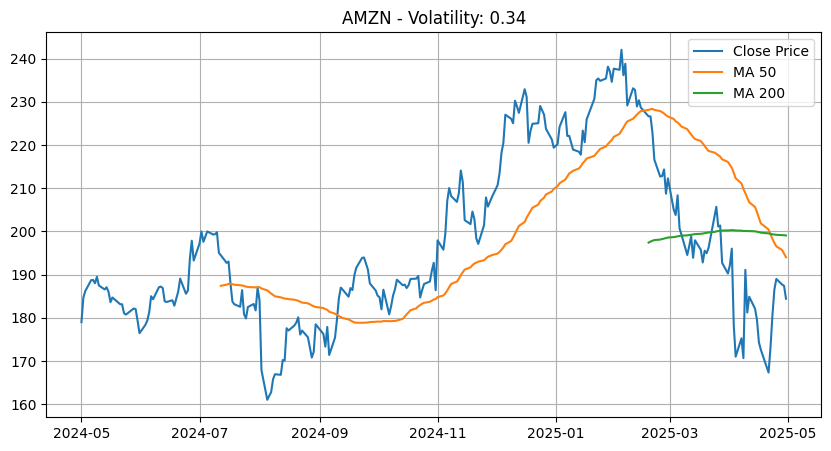

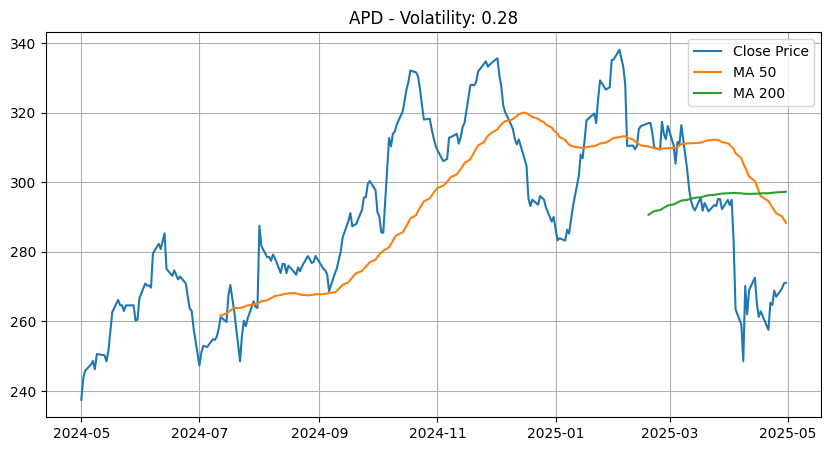

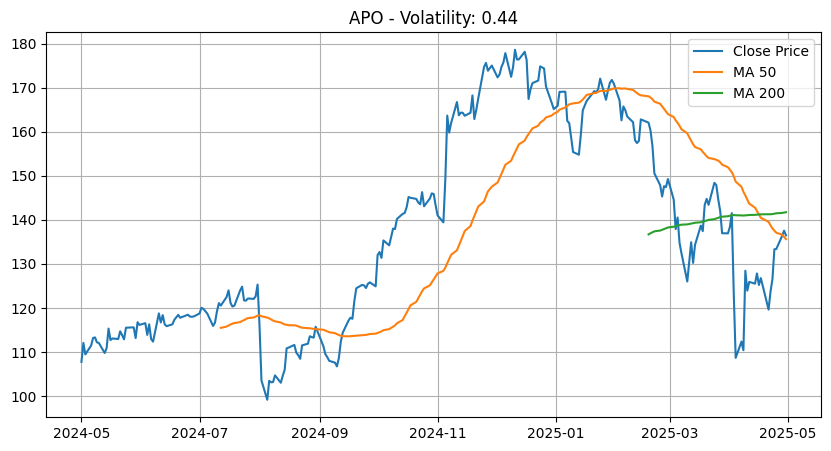

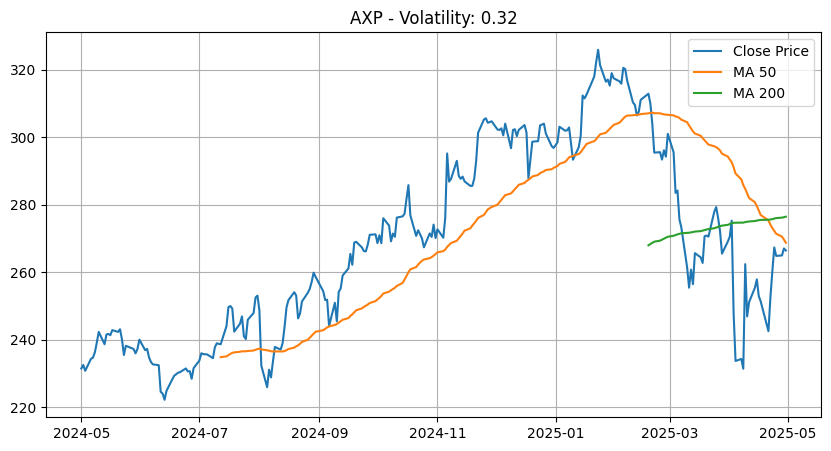

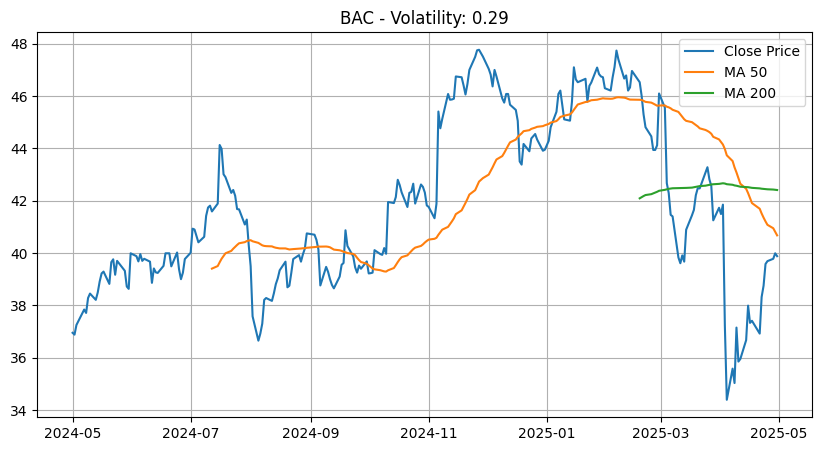

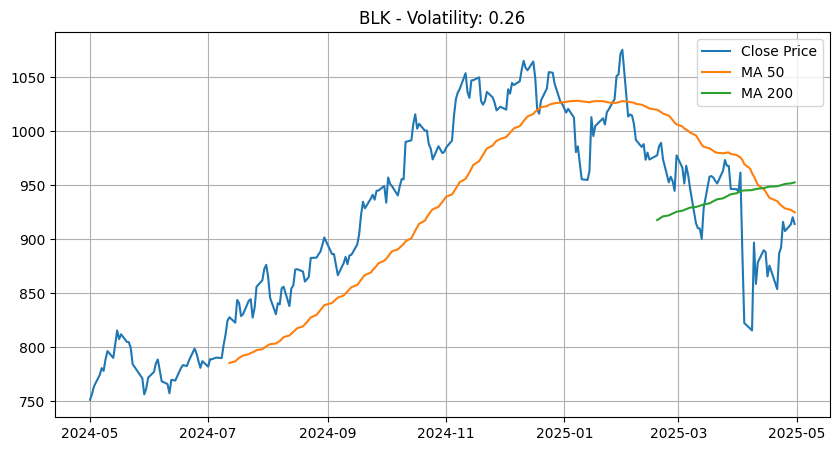

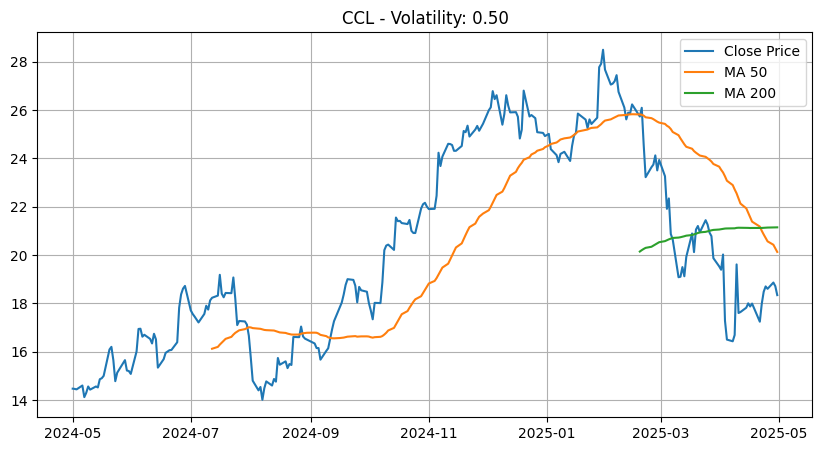

In [22]:
for ticker in death_crosses[:10]:
    plt.figure(figsize=(10, 5))
    plt.plot(df_prices[ticker], label='Close Price')
    plt.plot(df_ma50[ticker], label='MA 50')
    plt.plot(df_ma200[ticker], label='MA 200')
    plt.title(f'{ticker} - Volatility: {volatility[ticker]:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

## **Question section**

### Understanding concepts

#### **What is a Golden Cross and what does it typically signal to investors?**

A golden cross visually indicates the potential for a long-term upward trend. While many investors view it as a buying opportunity, others may defer purchases anticipating a future price dip. Though not conclusive, it signals sustained positive momentum



#### **What is a Death Cross and how might market participants react to it?**

A death cross, the inverse of a golden cross, signals a bearish market. While some investors buy during price declines expecting future recovery, others may sell assets previously acquired at the time of an earlier death cross.



#### **Why might moving averages (MA50, MA200) be used as indicators in technical analysis?**

Moving averages reduce daily price volatility, aiding in trend detection. MA50 reflects short- to mid-term trends, while MA200 captures mid- to long-term trends, both assist in identifying bullish or bearish markets through golden and death cross signals


#### **Why are the last 14 days used to check for crosses? What are the implications of this choice?**

Because it enables the identification of recent signals and the detection of opportunities not yet priced into the market, the goal is to recognize them ahead of others in order to capitalize on new information




#### **How does volatility (e.g., measured using percentage change standard deviation) help contextualize the price movement around crosses?**

Volatility measures price fluctuations. High volatility may signal market uncertainty or false signals, as it undermines confidence in the existence of a stable trend due to rapidly changing prices. Conversely, low volatility tends to instill greater investor confidence, making market signals more reliable

### Backtesting and evaluation

#### **How would you measure whether Golden Crosses actually lead to profitable trades?**

Based on my research, one way to assess whether a golden cross strategy yields profits is through backtesting. This involves simulating a buy order upon the occurrence of a golden cross and either selling at a death cross or after a predetermined number of days. The average return is then calculated and compared to a benchmark index, such as the S&P 500. This helps validate whether the strategy would genuinely generate value without incurring losses


#### **What are the risks of using only technical indicators like moving averages without incorporating fundamentals?**

Key data such as earnings, debt levels, growth prospects, and relevant company or sector information are often overlooked. I believe it is essential to combine technical analysis with fundamental analysis to better interpret market events

#### **How would you improve this strategy to reduce false signals (e.g., a Golden Cross that doesn’t lead to a price increase)?**

According to a brief investigation I conducted, reviewing the trend of the market index and ensuring it is also bullish can be beneficial. Another approach involves incorporating additional indicators such as RSI or MACD.


### AI Integration


#### **Could sentiment from news (future project part) help validate or invalidate these technical signals?**

Yes, sentiment analysis may complement technical analysis by identifying positive sentiment during a golden cross and prevailing negative sentiment during a death cross


### Critical thinking

#### **From a trading perspective, is this strategy actionable on its own?**

Golden and death crosses may be useful indicators, but I would not invest based solely on them. I would examine additional indicators, incorporate sentiment analysis, and research sector-specific and company-specific risks.


#### **Based on the volatility observed post-Golden Cross, do these crosses consistently predict upward movement?**

High volatility signals uncertainty and may disrupt an identified trend. To mitigate this, one can assess consistency through statistical backtesting that measures how often crosses lead to sustained gains.



#### **If you had to present this analysis to a portfolio manager, what conclusions would you emphasize? What caveats would you include?**

**Conclusions in 2 bullet points:**


1.   Golden and death crosses are valuable complementary tools when used alongside other financial indicators to guide investment decisions.
2.   I recommend incorporating sentiment analysis from news sources and examining potential correlations to create a more comprehensive analysis


**Caveats in 2 or 3 bullet points:**

1.   Neither golden nor death crosses guarantee accurate trend predictions, as they may represent mere technical noise
2.   This strategy lacks consideration of financial fundamentals

